In [304]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler
from torch import nn
import torch
from matplotlib import pyplot as plt

Scoring Mechanism

Q1. Complex Statistical Inference 

Best - 2 points, Doable - 1 points, Impossible - 0 point

Q2. Clusters

If data doesn't have clusters
    - Answered NO - 2 points
    - Answered YES - 0 points
    
If data has clusters 
    - Answered NO - 0 points
    - Answered YES -
        (a) # of clusters same as ground truth - 2 points
        (b) # of clusters different from ground truth - 0 points

Q3. Threshold above Y-axis

If answer is such that

    - |answer - actual| <= 20% of actual - 2 points
    - |answer - actual| <= 40% of actual - 1 points
    - Else 0 points

Q4. Threshold above X-axis

If answer is such that

    - |answer - actual| <= 20% of actual - 2/1 points
    - |answer - actual| <= 40% of actual - 1/0.5 points
    - Else 0 points

Scores will be decided for each plot type for each datapoint. For each datapoint, the plot type with the highest score is the User's preferred choice of plot type.



In [277]:
############################# POINTS FOR Q1 ###############################

In [278]:
df1 = pd.read_csv('./results/Experiment 2/Q1_CSI-Batch_84_results.csv')

In [279]:
# Key : img_number, Value : ['Answer.Scatter', 'Answer.Line', 'Answer.Density']
answers = {}

for i in range(35):
    answers[df1.iloc[i]['Input.image_url1'].split('/')[-1][:-16]] = [df1.iloc[i]['Answer.Scatter'], df1.iloc[i]['Answer.Line'], df1.iloc[i]['Answer.Density']]

In [280]:
def points_for_choice(choice):
    assert type(choice)==str, "Choice is not string type"
    
    if (choice=='Best'):
        return 2
    elif (choice=='Doable'):
        return 1
    elif (choice=='Impossible'):
        return 0

In [281]:
points = {}

for key in answers.keys():
    points[int(key)] = list(map(points_for_choice, answers[key]))

In [282]:
print(points)

{365: [1, 0, 2], 1296: [1, 1, 2], 60: [0, 1, 2], 1200: [1, 1, 2], 827: [1, 0, 2], 287: [1, 0, 2], 874: [1, 1, 2], 289: [1, 1, 2], 1148: [1, 1, 0], 1106: [2, 1, 1], 1351: [1, 1, 2], 1366: [2, 1, 1], 173: [0, 0, 2], 714: [1, 0, 2], 16: [2, 0, 1], 1086: [2, 1, 1], 1283: [2, 1, 1], 117: [2, 1, 1], 961: [1, 1, 2], 1235: [2, 1, 1], 37: [1, 1, 2], 1401: [2, 1, 1], 849: [1, 2, 0], 871: [2, 1, 0], 442: [1, 1, 2], 838: [1, 0, 2], 898: [2, 1, 1], 696: [1, 1, 2], 1396: [1, 1, 2], 495: [1, 0, 2], 1104: [1, 1, 2], 3: [2, 1, 1], 1425: [1, 1, 2], 1041: [2, 1, 1], 560: [1, 1, 2]}


In [283]:
best = {'Density':0, 'Scatter':0, 'Line':0}
doable = {'Density':0, 'Scatter':0, 'Line':0}
impossible = {'Density':0, 'Scatter':0, 'Line':0}

for key in points.keys():
    if(points[key][2]==2):
        best['Density']+=1
    if(points[key][1]==2):
        best['Line']+=1
    if(points[key][0]==2):
        best['Scatter']+=1

for key in points.keys():
    if(points[key][2]==1):
        doable['Density']+=1
    if(points[key][1]==1):
        doable['Line']+=1
    if(points[key][0]==1):
        doable['Scatter']+=1
        
for key in points.keys():
    if(points[key][2]==0):
        impossible['Density']+=1
    if(points[key][1]==0):
        impossible['Line']+=1
    if(points[key][0]==0):
        impossible['Scatter']+=1

In [284]:
print(best)
print(doable)
print(impossible)

{'Density': 21, 'Scatter': 12, 'Line': 1}
{'Density': 11, 'Scatter': 21, 'Line': 26}
{'Density': 3, 'Scatter': 2, 'Line': 8}


In [8]:
############################# POINTS FOR Q2 ############################### (SKIPPING FOR NOW)

Optimal Number of Clusters is 3


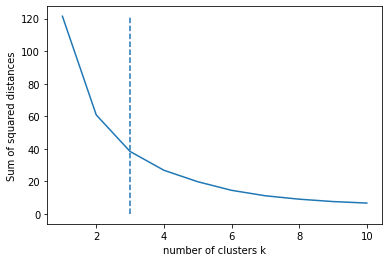

In [305]:
y = pickle.load(open('./plots/871/871.pkl', 'rb'))[0]['Y']
x = pickle.load(open('./plots/871/871.pkl', 'rb'))[0]['X']

data = np.asarray(list(zip(x,y)), np.float64)

mms = MinMaxScaler()
mms.fit(data)
data = mms.transform(data)

from sklearn.cluster import KMeans
from kneebow.rotor import Rotor

Sum_of_squared_distances = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)

from kneed import KneeLocator
kn = KneeLocator(np.arange(1,11,1), Sum_of_squared_distances, curve='convex', direction='decreasing')

print("Optimal Number of Clusters is %d" %(kn.knee))

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.vlines(kn.knee, plt.ylim()[0], Sum_of_squared_distances[0], linestyles='dashed')
plt.plot(np.arange(1,11,1), Sum_of_squared_distances)




In [ ]:
# #Find clusters from data
# data_dir = './turkle_data/'
# pickle.load(open(data_dir + '827/827.pkl', 'rb'))

In [217]:
############################# POINTS FOR Q3 ###############################

In [218]:
df3 = pd.read_csv('./results/Experiment 2/Q3_threshold-Batch_86_results.csv')

In [219]:
df3.head()

,HITId,HITTypeId,Title,CreationTime,MaxAssignments,AssignmentDurationInSeconds,AssignmentId,WorkerId,AcceptTime,SubmitTime,WorkTimeInSeconds,Input.image_url1,Answer.fraction,Turkle.Username
0,42786,19,Q3_threshold,Thu Mar 03 07:58:55 UTC 2021,1,86400,3762,54,Thu Mar 03 09:56:37 UTC 2021,Thu Mar 03 09:56:42 UTC 2021,4,https://raw.githubusercontent.com/ritvik06/tur...,0.3,Skandregula
1,42787,19,Q3_threshold,Thu Mar 03 07:58:55 UTC 2021,1,86400,3770,54,Thu Mar 03 10:01:00 UTC 2021,Thu Mar 03 10:01:04 UTC 2021,4,https://raw.githubusercontent.com/ritvik06/tur...,0.5,Skandregula
2,42788,19,Q3_threshold,Thu Mar 03 07:58:55 UTC 2021,1,86400,3771,54,Thu Mar 03 10:01:04 UTC 2021,Thu Mar 03 10:01:17 UTC 2021,12,https://raw.githubusercontent.com/ritvik06/tur...,0.6,Skandregula
3,42789,19,Q3_threshold,Thu Mar 03 07:58:55 UTC 2021,1,86400,3772,54,Thu Mar 03 10:01:17 UTC 2021,Thu Mar 03 10:01:23 UTC 2021,6,https://raw.githubusercontent.com/ritvik06/tur...,0.3,Skandregula
4,42790,19,Q3_threshold,Thu Mar 03 07:58:55 UTC 2021,1,86400,3773,54,Thu Mar 03 10:01:23 UTC 2021,Thu Mar 03 10:01:30 UTC 2021,6,https://raw.githubusercontent.com/ritvik06/tur...,0.5,Skandregula


In [220]:
answers_q3 = {}

for i in range(105):
    answers_q3[(df3.iloc[i]['Input.image_url1'].split('/')[-1]).split('_num')[0]] = df3.iloc[i]['Answer.fraction']

In [221]:
data_dir = './turkle_data/'

orig_answersq3 = {}

for key in answers.keys():
    data_y = pickle.load(open(data_dir + key + '/' + key + '.pkl', 'rb'))[0]['Y']
    
    orig_ans = len(np.where(np.asarray([data_y[i] for i in range(len(data_y))]) > 0.5)[0])/len(data_y)
    
    orig_answersq3[key+'_scatter'] = orig_ans
    orig_answersq3[key+'_line'] = orig_ans
    orig_answersq3[key+'_density'] = orig_ans


#     print(orig_answersq3)

In [222]:
dif_y = {}
for key in orig_answersq3.keys():
    dif_y[key] = (np.abs(answers_q3[key] - orig_answersq3[key])*100)/orig_answersq3[key]

In [223]:
best = {'Density':0, 'Scatter':0, 'Line':0}
doable = {'Density':0, 'Scatter':0, 'Line':0}
impossible = {'Density':0, 'Scatter':0, 'Line':0}

for key in points.keys():
    if(dif_y[str(key)+'_scatter'] <= 20):
        points[key][0]+=2
        best['Scatter']+=1
    elif(dif_y[str(key)+'_scatter'] <= 40):
        points[key][0]+=1
        doable['Scatter']+=1
    else:
        impossible['Scatter']+=1

    if(dif_y[str(key)+'_line'] <= 20):
        points[key][1]+=2
        best['Line']+=1
    elif(dif_y[str(key)+'_line'] <= 40):
        points[key][1]+=1
        doable['Line']+=1
    else:
        impossible['Line']+=1

    if(dif_y[str(key)+'_density'] <= 20):
        points[key][2]+=2
        best['Density']+=1
    elif(dif_y[str(key)+'_density'] <= 40):
        points[key][2]+=1
        doable['Density']+=1
    else:
        impossible['Density']+=1

In [224]:
print(points)

{365: [3, 0, 2], 1296: [3, 1, 2], 60: [1, 2, 3], 1200: [2, 1, 4], 827: [3, 0, 2], 287: [1, 2, 4], 874: [3, 3, 2], 289: [2, 3, 3], 1148: [1, 1, 0], 1106: [2, 3, 3], 1351: [3, 3, 4], 1366: [4, 3, 1], 173: [2, 2, 4], 714: [1, 0, 4], 16: [2, 1, 1], 1086: [4, 3, 3], 1283: [3, 2, 1], 117: [4, 3, 3], 961: [3, 2, 2], 1235: [4, 2, 1], 37: [3, 3, 2], 1401: [4, 2, 2], 849: [2, 4, 1], 871: [3, 1, 1], 442: [3, 3, 4], 838: [3, 2, 4], 898: [3, 2, 2], 696: [1, 3, 2], 1396: [1, 2, 4], 495: [1, 0, 4], 1104: [1, 1, 2], 3: [4, 3, 3], 1425: [2, 2, 4], 1041: [4, 3, 2], 560: [3, 3, 2]}


In [225]:
print(best)
print(doable)
print(impossible)

{'Density': 14, 'Scatter': 18, 'Line': 17}
{'Density': 7, 'Scatter': 8, 'Line': 9}
{'Density': 14, 'Scatter': 9, 'Line': 9}


In [226]:
############################# POINTS FOR Q4 ###############################

In [227]:
df4 = pd.read_csv('./results/Experiment 2/Q4_Threshold-Batch_87_results.csv')

In [228]:
answers_q4 = {}

for i in range(105):
    answers_q4[(df4.iloc[i]['Input.image_url1'].split('/')[-1]).split('_num')[0]] = float(df4.iloc[i]['Answer.fraction'])

In [229]:
data_dir = './turkle_data/'

orig_answersq4 = {}

for key in answers.keys():
    data_x = pickle.load(open(data_dir + key + '/' + key + '.pkl', 'rb'))[0]['X']
    
    orig_ans = len(np.where(np.asarray([data_x[i] for i in range(len(data_x))]) > 0.5)[0])/len(data_x)
    
    orig_answersq4[key+'_scatter'] = orig_ans
    orig_answersq4[key+'_line'] = orig_ans
    orig_answersq4[key+'_density'] = orig_ans

In [230]:
dif_x = {}
for key in orig_answersq4.keys():
    dif_x[key] = (np.abs(answers_q4[key] - orig_answersq4[key])*100)/orig_answersq4[key]

In [231]:
best = {'Density':0, 'Scatter':0, 'Line':0}
doable = {'Density':0, 'Scatter':0, 'Line':0}
impossible = {'Density':0, 'Scatter':0, 'Line':0}

for key in points.keys():
    if(dif_x[str(key)+'_scatter'] <= 20):
        points[key][0]+=1
        best['Scatter']+=1
    elif(dif_x[str(key)+'_scatter'] <= 40):
        points[key][0]+=0.5
        doable['Scatter']+=1
    else:
        impossible['Scatter']+=1

    if(dif_x[str(key)+'_line'] <= 20):
        points[key][1]+=1
        best['Line']+=1
    elif(dif_x[str(key)+'_line'] <= 40):
        points[key][1]+=0.5
        doable['Line']+=1
    else:
        impossible['Line']+=1

    if(dif_x[str(key)+'_density'] <= 20):
        points[key][2]+=1
        best['Density']+=1
    elif(dif_x[str(key)+'_density'] <= 40):
        points[key][2]+=0.5
        doable['Density']+=1
    else:
        impossible['Density']+=1

In [264]:
print(points)
print(best)
print(doable)
print(impossible)

{365: [1, 0, 2], 1296: [1, 1, 2], 60: [0, 1, 2], 1200: [1, 1, 2], 827: [1, 0, 2], 287: [1, 0, 2], 874: [1, 1, 2], 289: [1, 1, 2], 1148: [1, 1, 0], 1106: [2, 1, 1], 1351: [1, 1, 2], 1366: [2, 1, 1], 173: [0, 0, 2], 714: [1, 0, 2], 16: [2, 0, 1], 1086: [2, 1, 1], 1283: [2, 1, 1], 117: [2, 1, 1], 961: [1, 1, 2], 1235: [2, 1, 1], 37: [1, 1, 2], 1401: [2, 1, 1], 849: [1, 2, 0], 871: [2, 1, 0], 442: [1, 1, 2], 838: [1, 0, 2], 898: [2, 1, 1], 696: [1, 1, 2], 1396: [1, 1, 2], 495: [1, 0, 2], 1104: [1, 1, 2], 3: [2, 1, 1], 1425: [1, 1, 2], 1041: [2, 1, 1], 560: [1, 1, 2]}
{'Density': 21, 'Scatter': 12, 'Line': 1}
{'Density': 11, 'Scatter': 21, 'Line': 26}
{'Density': 3, 'Scatter': 2, 'Line': 8}


In [285]:
best = {}
second_best = {}

for key in points.keys():
    idx = (-np.asarray(points[key])).argsort()[:2]
    best[key] =  idx[0]
    second_best[key] = idx[1]

In [286]:
best_types = {'scatter':0, 'line':0, 'density':0}
for key in best.keys():
    if(best[key]==0):
        best_types['scatter']+=1
    elif(best[key]==1):
        best_types['line']+=1
    else:
        best_types['density']+=1
        
print(best_types)

{'scatter': 13, 'line': 1, 'density': 21}


In [287]:
second_types = {'scatter':0, 'line':0, 'density':0}
for key in second_best.keys():
    if(second_best[key]==0):
        second_types['scatter']+=1
    elif(second_best[key]==1):
        second_types['line']+=1
    else:
        second_types['density']+=1
        
print(second_types)

{'scatter': 21, 'line': 13, 'density': 1}


In [301]:
pred_alex = np.load('./predictions/alexnet_turkle_pred2.npy')
pred_vgg = np.load('./predictions/vgg19_turkle_pred.npy')

In [302]:
print(best)
print(second_best)

{365: 2, 1296: 2, 60: 2, 1200: 2, 827: 2, 287: 2, 874: 2, 289: 2, 1148: 0, 1106: 0, 1351: 2, 1366: 0, 173: 2, 714: 2, 16: 0, 1086: 0, 1283: 0, 117: 0, 961: 2, 1235: 0, 37: 2, 1401: 0, 849: 1, 871: 0, 442: 2, 838: 2, 898: 0, 696: 2, 1396: 2, 495: 2, 1104: 2, 3: 0, 1425: 2, 1041: 0, 560: 2}
{365: 0, 1296: 0, 60: 1, 1200: 0, 827: 0, 287: 0, 874: 0, 289: 0, 1148: 1, 1106: 1, 1351: 0, 1366: 1, 173: 0, 714: 0, 16: 2, 1086: 1, 1283: 1, 117: 1, 961: 0, 1235: 1, 37: 0, 1401: 1, 849: 0, 871: 1, 442: 0, 838: 0, 898: 1, 696: 0, 1396: 0, 495: 0, 1104: 0, 3: 1, 1425: 0, 1041: 1, 560: 0}


In [300]:
best_correct = 0

for i in range(len(pred_alex)):
    if best[int(pred_alex[i][0])] == int(pred_alex[i][1]):
        best_correct+=1
#     if best[int(pred_alex[i][0])] == int(pred_alex[i][2]):
#         best_correct+=1

        
    print("Predicted : " + str(int(pred_alex[i][1])) + ", Second Pred : " + str(int(pred_alex[i][2])) + ",   True : " + str(best[int(pred_alex[i][0])]))

print(best_correct)

Predicted : 2, Second Pred : 1,   True : 0
Predicted : 0, Second Pred : 1,   True : 2
Predicted : 2, Second Pred : 1,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 2,   True : 0
Predicted : 2, Second Pred : 0,   True : 0
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 2, Second Pred : 1,   True : 0
Predicted : 0, Second Pred : 1,   True : 2
Predicted : 2, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 2, Second Pred : 1,   True : 2
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 2, Second Pred : 1,   True : 0
Predicted : 2, Second Pred : 0,   True : 0
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 2,   True : 2
Predicted : 2, Second Pred : 0,   True : 0
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 2, Second Pred : 1,   True : 0
Predicted :

In [303]:
best_correct = 0

for i in range(len(pred_alex)):
    if best[int(pred_alex[i][0])] == int(pred_alex[i][1]):
        best_correct+=1
#     if best[int(pred_alex[i][0])] == int(pred_alex[i][2]):
#         best_correct+=1

        
    print("Predicted : " + str(int(pred_alex[i][1])) + ", Second Pred : " + str(int(pred_alex[i][2])) + ",   True : " + str(best[int(pred_alex[i][0])]))

print(best_correct)

Predicted : 2, Second Pred : 1,   True : 0
Predicted : 0, Second Pred : 1,   True : 2
Predicted : 2, Second Pred : 1,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 2,   True : 0
Predicted : 2, Second Pred : 0,   True : 0
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 2, Second Pred : 1,   True : 0
Predicted : 0, Second Pred : 1,   True : 2
Predicted : 2, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 2, Second Pred : 1,   True : 2
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 2, Second Pred : 1,   True : 0
Predicted : 2, Second Pred : 0,   True : 0
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 2,   True : 2
Predicted : 2, Second Pred : 0,   True : 0
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 2, Second Pred : 1,   True : 0
Predicted :

In [293]:
best_correct = 0

for i in range(len(pred_vgg)):
    if best[int(pred_vgg[i][0])] == int(pred_vgg[i][1]):
        best_correct+=1
#     elif best[int(pred_vgg[i][0])] == int(pred_vgg[i][2]):
#         best_correct+=1

        
    print("Predicted : " + str(int(pred_vgg[i][1])) + ", Second Pred : " + str(int(pred_vgg[i][2])) + ",   True : " + str(best[int(pred_vgg[i][0])]))

print(best_correct)

Predicted : 2, Second Pred : 1,   True : 0
Predicted : 0, Second Pred : 1,   True : 2
Predicted : 0, Second Pred : 1,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 2,   True : 0
Predicted : 1, Second Pred : 0,   True : 0
Predicted : 0, Second Pred : 2,   True : 2
Predicted : 2, Second Pred : 1,   True : 2
Predicted : 1, Second Pred : 2,   True : 2
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 2, Second Pred : 1,   True : 2
Predicted : 2, Second Pred : 0,   True : 2
Predicted : 1, Second Pred : 0,   True : 0
Predicted : 1, Second Pred : 2,   True : 2
Predicted : 1, Second Pred : 0,   True : 0
Predicted : 0, Second Pred : 1,   True : 0
Predicted : 1, Second Pred : 2,   True : 0
Predicted : 0, Second Pred : 2,   True : 0
Predicted : 2, Second Pred : 0,   True : 2
Predicted : 1, Second Pred : 0,   True : 2
Predicted : 0, Second Pred : 2,   True : 0
Predicted : 0, Second Pred : 1,   True : 2
Predicted : 2, Second Pred : 1,   True : 0
Predicted :

In [272]:
def loss_fn(feats, out):
    loss = nn.MSELoss()
    
    loss_vector = np.abs(feats-out)
    
    return loss(torch.from_numpy(feats), torch.from_numpy(out))

In [273]:
def accuracy(predictions, gold_labels):
    
    correct = 0
    
    for cnt, pred in enumerate(predictions):
        if(pred==gold_labels[cnt]):
            correct+=1
    
    return correct

In [274]:
pred_stats = np.load('./predictions/pred_stats/alex_stats_exp2.npy')
img_order = np.load('./predictions/pred_stats/img_order.npy')

In [197]:
#Create weight search space for all possible combinations

weight_space = np.ones((6))
max_acc = 0

for i in range(1,5):
    weight_space[0] = i
    for j in range(1,5):
        weight_space[1] = j
        for k in range(1,5):
            weight_space[2] = k
            for l in range(1,5):
                weight_space[3] = l
                for m in range(1,5):
                    weight_space[4] = m
                    for n in range(1,5):
                        weight_space[5] = n
                        per_img_loss = np.zeros((35,3))
                        
                        true_pred = np.zeros((35))
                        
                        for cnt, folder_index in enumerate(img_order):
                            
                            true_pred[cnt] = best[int(pred_alex[cnt][0])]
                            
                            true_stats = pred_stats[cnt][3]
                            
                            for plot_type in range(3):
                                
                                temp_stats = np.zeros((26))
                    
#                                 print(temp_stats)
                                for stat in range(26):
        
                                    temp_stat = pred_stats[cnt][plot_type][stat]
            
                                    if(stat%5==0 and stat!=25):
                                        temp_stat *= weight_space[0]
                                    elif(stat%5==1):
                                        temp_stat *= weight_space[1]
                                    elif(stat%5==2):
                                        temp_stat *= weight_space[2]
                                    elif(stat%5==3):
                                        temp_stat *= weight_space[3]
                                    elif(stat%5==4):
                                        temp_stat *= weight_space[4]
                                    elif(stat==25):
                                        temp_stat *= weight_space[5]
                                
                                temp_stats[stat] = temp_stat
                                
                                per_img_loss[cnt][plot_type] = loss_fn(temp_stats, true_stats).detach().numpy()
                                
                        predictions = np.argmin(per_img_loss, axis=1)
                        if max_acc < accuracy(predictions, true_pred):
#                             print(weight_space)
#                             print(max_acc)
#                             print(accuracy(predictions, true_pred))
                            max_acc = accuracy(predictions, true_pred)
                            best_weights = weight_space
                            print(max_acc)

print(max_acc)                            
print(best_weights)

8
8
[4. 4. 4. 4. 4. 4.]


In [275]:
for cnt,row in enumerate(pred_alex):
    print("Plot: " + str(int(row[0])) + " ; Prediction: " + str(int(row[1]))  + " ; True: " + str(best[int(pred_vgg[cnt][0])]))

Plot: 1235 ; Prediction: 2 ; True: 0
Plot: 173 ; Prediction: 0 ; True: 2
Plot: 1396 ; Prediction: 1 ; True: 2
Plot: 1351 ; Prediction: 0 ; True: 2
Plot: 898 ; Prediction: 1 ; True: 0
Plot: 1148 ; Prediction: 0 ; True: 0
Plot: 1200 ; Prediction: 0 ; True: 2
Plot: 365 ; Prediction: 1 ; True: 2
Plot: 560 ; Prediction: 1 ; True: 2
Plot: 1041 ; Prediction: 2 ; True: 0
Plot: 714 ; Prediction: 2 ; True: 2
Plot: 1104 ; Prediction: 0 ; True: 2
Plot: 117 ; Prediction: 1 ; True: 0
Plot: 289 ; Prediction: 1 ; True: 2
Plot: 1366 ; Prediction: 0 ; True: 0
Plot: 1086 ; Prediction: 1 ; True: 0
Plot: 1283 ; Prediction: 2 ; True: 0
Plot: 3 ; Prediction: 0 ; True: 0
Plot: 1296 ; Prediction: 1 ; True: 2
Plot: 495 ; Prediction: 0 ; True: 2
Plot: 871 ; Prediction: 1 ; True: 0
Plot: 838 ; Prediction: 0 ; True: 2
Plot: 16 ; Prediction: 2 ; True: 0
Plot: 1425 ; Prediction: 0 ; True: 2
Plot: 1106 ; Prediction: 0 ; True: 0
Plot: 874 ; Prediction: 2 ; True: 2
Plot: 961 ; Prediction: 0 ; True: 2
Plot: 1401 ; Predi

In [ ]:
WRONG

Plot: 560 ; Prediction: 1 ; True: 2
Plot: 365 ; Prediction: 1 ; True: 2
Plot: 1296 ; Prediction: 1 ; True: 2

In [ ]:
RIGHT